<a href="https://colab.research.google.com/github/abdulazizkomilov/Data-Science/blob/main/DL_rasmlarni_klassifikatsiyalash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastai-2.5.3-py3-none-any.whl (189 kB)
  Using cached fastcore-1.3.29-py3-none-any.whl (55 kB)
     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x39e18000 @  0x7fcf5c1f8615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 83.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uni

In [2]:
# kutubxonalarni yuklab olish
import torch

import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [3]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'), 
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.055046,2.652700,00:04


epoch,train_loss,valid_loss,time
0,2.089419,1.901713,00:01
1,1.727552,1.409024,00:01
2,1.491629,1.358582,00:01
3,1.331573,1.118801,00:01
4,1.177792,0.979750,00:02
5,1.042790,0.898024,00:01
6,0.930123,0.881607,00:01
7,0.839785,0.863027,00:01
8,0.766491,0.847600,00:01
9,0.706404,0.866637,00:01


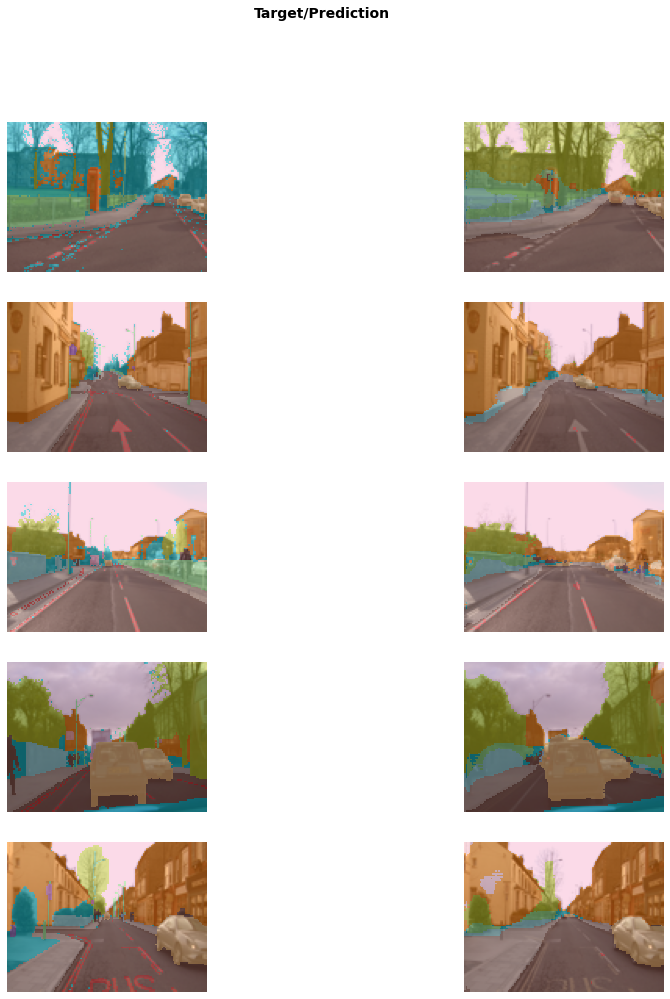

In [4]:
learn.show_results(max_n=5, figsize=(15, 16))